데이터 분석의 목표 : 어떤 사람들이 생존에 유리했을지 파악하기

참고(in Kaggle)
1.  EDA To Prediction(DieTanic) 
2.  Titanic Data Science Solutions

# 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_df = pd.read_csv('/content/Mydrive/MyDrive/datascience/train.csv')
test_df = pd.read_csv('/content/Mydrive/MyDrive/datascience/test.csv')
combine = [train_df, test_df] # train셋과 test셋을 동시에 전처리 하기 위함 

# 데이터 확인하기

**★각 컬럼에 대한 설명입니다★**

PassengerId : 각 승객의 고유 번호

Survived : 생존 여부(생존x : 0, 생존O : 1)

Pclass :  티켓의 등급 (1 = 1등급, 2 = 2등급, 3 = 3등급)

Name : 탑승객의 이름

Sex : 탑승객의 성별 (male or female)

Age : 탑승객의 나이

SibSp : 함께 탑승한 형제 또는 배우자 수 

Parch : 함께 탑승한 부모 또는 자녀 수 

Ticket : 티켓 번호

Fare : 요금

Cabin : 선실 번호

Embarked : 탑승장소(S = Southhampton, C = Cherbourg, Q = Queenstown)


데이터 유형 살피기
- categorical : sex, embarked
- ordinal : Pclass
- continous : Age

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**1. 공통적으로 Age, Cabin, Embarked 에 NaN값이 존재, test셋에는 Fare에 1개의 NaN값이 존재**

**2.  Name, Sex, Age, Fare, Embarked 는 인코딩 작업이 필요 해 보인다.** 

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df[['SibSp', 'Parch']].head(15)

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,3,1
8,0,2
9,1,0


**1. Sibsp 와 Parch는 한개의 컬럼으로 줄일 수 있을것 같다.**

**2. Embarked는 위의 자료만으로 확실하게 필요한 데이터 라는 여부를 판단하기 힘들다.**

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train_df.describe(include ='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McCoy, Mr. Bernard",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [10]:
test_df.describe(include ='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Louch, Mr. Charles Alexander",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


**1. 남성 탑승객이 여성 탑승객 보다 많은 것을 알 수 있다.**

**2. 다수의 승객분들이 Southampton에서 탑승한 것을 알 수 있다.**

# 시각화를 통한 데이터 탐색하기

얼마나 많은 사람들이 살아남았는가?

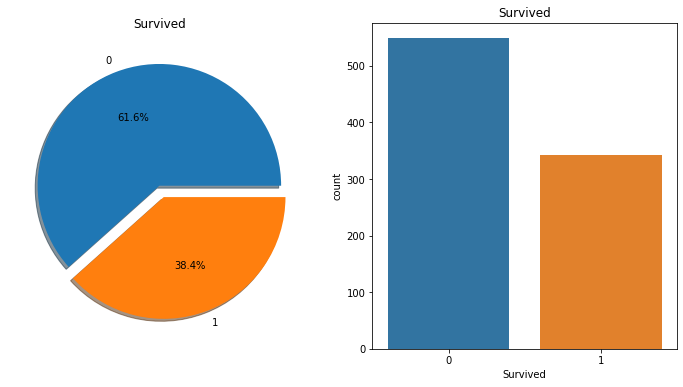

In [11]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax= ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('') 
sns.countplot(x ='Survived', data = train_df,ax = ax[1] )
ax[1].set_title('Survived')
plt.show()

Pclass와 Survived의 관계

In [12]:
pd.crosstab(train_df.Pclass, train_df.Survived, margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


crosstab

pd.crosstab(index, columns,margins= , normalize = )

pd.crosstab([id1,id2],[col1,col2],margins= , normalize = )

- margins : 행 합, 열 합
- normalize : 비율(퍼센트 표기)
- rownames=[' '] , colnames = [' ']
 


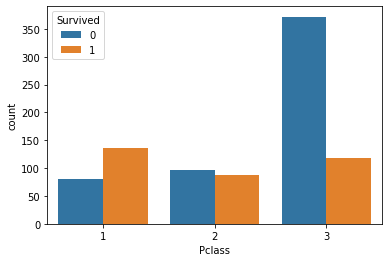

In [13]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = train_df)

**티켓의 등급이 높을 수록 생존율이 높다.**

Sex와 Survived의 관계


In [14]:
train_df[['Sex', 'Survived']].groupby('Sex', as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [16]:
pd.crosstab(train_df.Sex, train_df.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


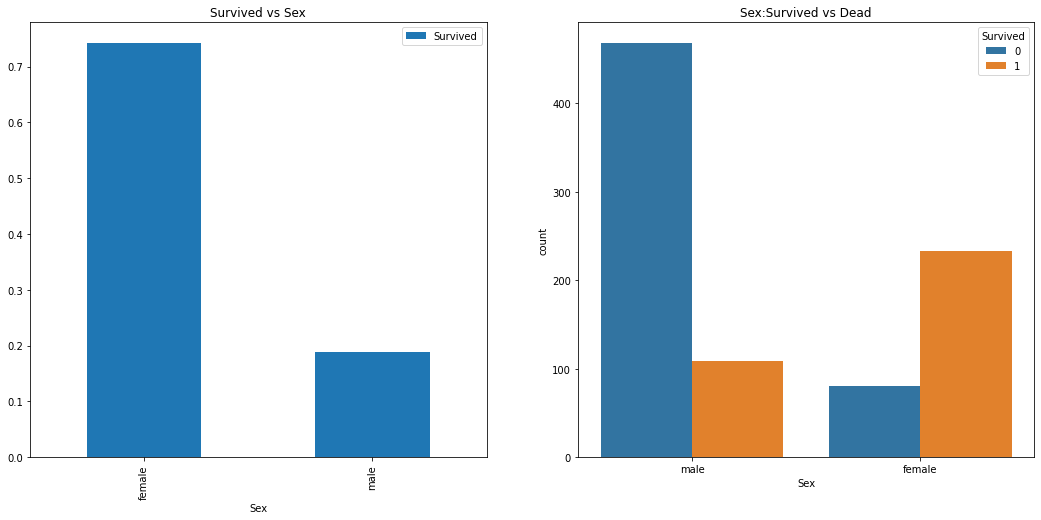

In [17]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train_df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

# train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=axes[0]) 
# 'Sex'와 'Survived'를 가져와서 'Sex'별로 survived의 평균값을 barplot으로 (pandas로 플랏접근)

**여성의 생존율이 훨씬 높다는 것을 알게 되었다.**

'Sex'와 'Pclass'와의 생존 관계 정리



In [18]:
pd.crosstab([train_df.Sex,train_df.Survived],train_df.Pclass,margins=True).style.background_gradient(cmap='summer_r')
# 다시한번 등급이 높을수록 생존 비율이 높으며 여성의 생존이 더 높다는것을 
# 알 수 있다.

'Age'와 'Survived'의 관계 정리

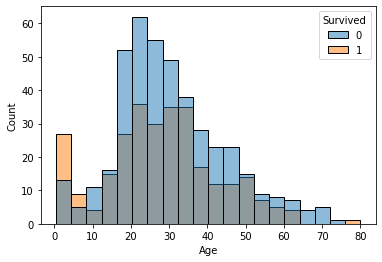

In [19]:
sns.histplot(x = 'Age',hue = 'Survived', data = train_df)

In [20]:
for total_data in combine:
  young_people = total_data.loc[total_data['Age'] < 10, 'Age']

young_people

21     9.00
80     6.00
89     2.00
117    1.00
161    7.00
194    8.00
196    6.00
201    0.33
203    8.00
250    0.92
263    1.00
281    0.75
283    9.00
284    2.00
296    1.00
307    0.83
354    0.17
379    5.00
389    6.00
409    3.00
Name: Age, dtype: float64

In [21]:
for total_data in combine:
  old_people = total_data.loc[total_data['Age']>70, 'Age']
old_people

96    76.0
Name: Age, dtype: float64

**생존이 더 높은 연령층은 10세 미만 아이들과  76세의 고령탑승객이다.**

'Sibsp'와 'Parch' 각각의 'Survived'와의 관계

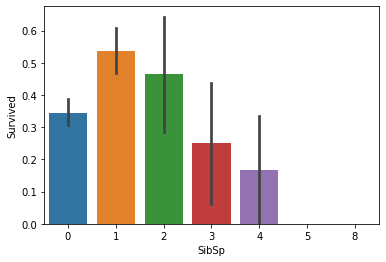

In [22]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train_df)

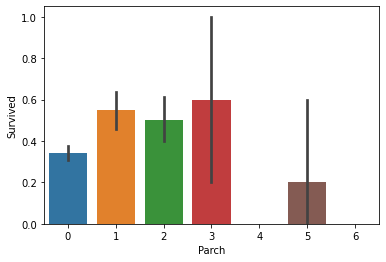

In [23]:
sns.barplot(x = 'Parch', y = 'Survived', data = train_df)

'Embarked' 와 'Survived' 의 관계

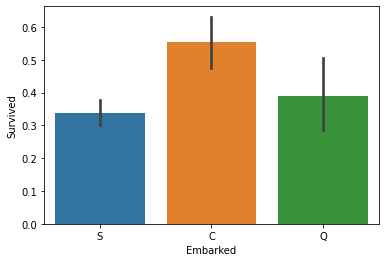

In [24]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train_df)

'Embarked'와 'Pclass' 별로 'Sex'와 'Survived'의 관계

In [25]:
pd.crosstab([train_df.Embarked,train_df.Pclass],[train_df.Sex,train_df.Survived],margins=True).style.background_gradient(cmap='summer_r')

탑승장소에 대한 자세한 특성을 알아봐야할 필요가 있을것 같다.


각 변수들 간의 상관관계



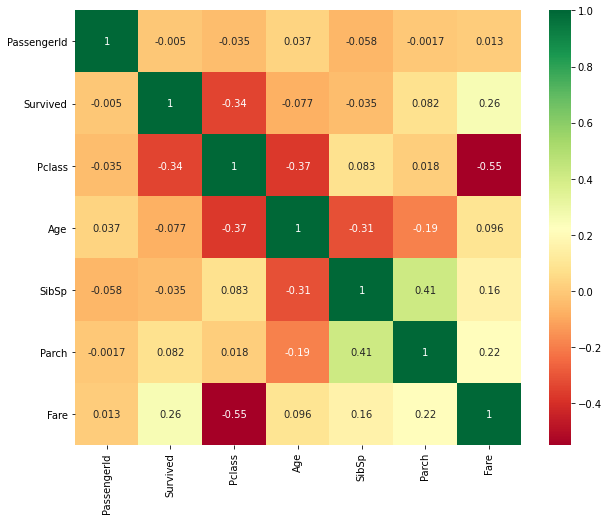

In [26]:
# heatmap을 사용하면 각 변수들 간의 correlation을 확인 할 수 있으며,
# 전처리 시 도움이 된다. 
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn') #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()



히트맵 코드 설명 (fig = plt.gcf())
plt.~~~ 코드로 그림을 그리는 방식을 상태기반(state-based)이라고 한다. 반면 그림의 구성요소를 지정해서 제어하는 것을 객체지향(object-oriented)방식이라고 한다. plt.로 그림을 그리다 보면 그림제어에 한계가 느껴져 객체지향으로 변환해야 하는데 그러때 쓰는것이 fig = plt.gcf()명령이다. 지금 그림(plt)의 전체영역(Figure)에 접근하겠다(gcf: get current figure)는 의미입니다. 

fig = plt.gcf()로 Figure객체를 fig라는 변수에 담은 후, figuresize 를 변경하는 명령이다.

하지만 matplot이 손에 익을 때 까지는 객체지향을 연습하며 사용하는것을 추천한다. ( 이재현 님 설명 인용)

In [27]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


heatmap
- annot = True 하면 값을 표시
- df.corr()  데이터간의 상관관계 correlation 의 줄임 

# 데이터 전처리

## Name 컬럼 전처리

Name 의 경우는 성 으로 추정되는 데이터를 바탕으로 구분을 하고자 한다.

In [28]:
# train_df
Name = []

for i in train_df['Name']:
  for h in i.split(' '):
    if '.' in h:
      Name.append(h[:-1])

Name

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Don',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 

In [29]:
# test_df
Name2 = []

for i in test_df['Name']:
  for h in i.split(' '):
    if '.' in h:
      Name2.append(h[:-1])

Name2

['Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Master',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Ms',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'M

In [30]:
# train_df
train_df['Name'] = pd.Series(Name)
train_df['Name']

# test_df
test_df['Name'] = pd.Series(Name2)
test_df['Name'] 

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, Length: 418, dtype: object

In [31]:
train_df['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'L', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

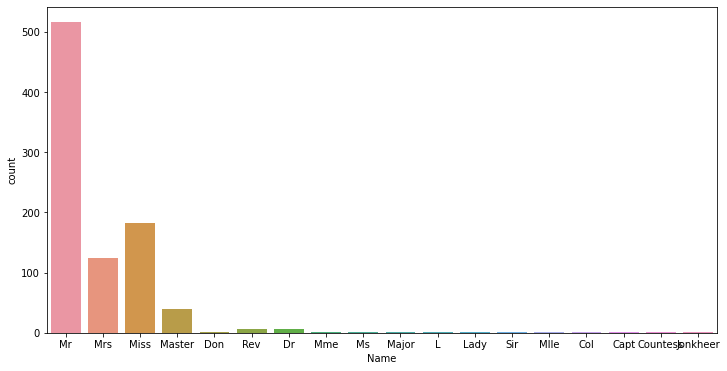

In [32]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Name',data = train_df)

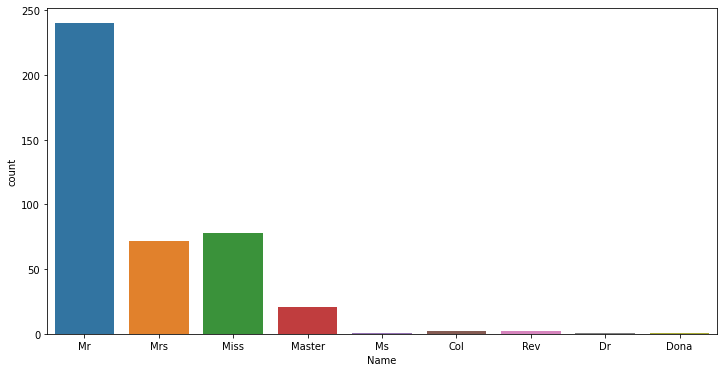

In [33]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Name',data = test_df)

Mr, Mrs, Miss, Master 를 제외한 다른 이름들은 극히 적은 인원수 를 가지고 있으므로 Others로 통일한다.

In [34]:
for all_data in combine:
  all_data['Name'] =all_data['Name'].replace (['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'L', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer','Dona'],'Others') # test셋에만 Dona라는 이름이 있으므로 주의

test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,Others,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,Mr,male,NaN,0,0,359309,8.0500,NaN,S


In [35]:
train_df['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [36]:
test_df['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [37]:
# 다수의 이름 순서대로 mapping

name_mapping = {'Mr' : 0, 'Miss' : 1, 'Mrs' : 2, 'Master' : 3, 'Others' : 4}
for all_data in combine:
  all_data['Name'] = all_data['Name'].map(name_mapping).astype(int)

# train_df
test_df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,2,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,0,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,0,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,2,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,4,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,0,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,0,male,NaN,0,0,359309,8.0500,NaN,S


## Sex 컬럽 전처리

남성은 0으로 여성은 1로 변환한다.

In [38]:
sex_mapping = {'male' : 0, 'female' : 1}
for all_data in combine:
  all_data['Sex'] = all_data['Sex'].map(sex_mapping).astype(int)
  
#train_df  
test_df



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,2,1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,0,0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,0,0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,2,1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,4,1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,0,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,0,0,NaN,0,0,359309,8.0500,NaN,S


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


## Age 컬럼 전처리

**현재 까지 알고있는 전처리 방법론은  첫 번째로, 해당 행을 지우는 방법과 두 번째로, 평균 값 혹은 0 으로 바꾸는 방법, 세 번째로 다른 컬럼들과의 관계를 이용하여 예측하는 방법 이렇게 세가지이다.**

**그 중 Age는 생존율 예측에 있어서 중요한 데이터 이므로 약 900개중 200개 가량의 데이터를 지우는 것은 좋지 않으며, 평균 혹은 0으로 바꾸어 주는것 또한 데이터의 상태를 변형시키기 때문에 세 번째 방법인 다른 컬럼들과의 관계를 통해 그 관계의 평균 값으로 Age를 예측하는 방법을 사용할 것이다.**

In [41]:
train_df[['Pclass',
          'Sex',
          'Age']].sample(10)

,Pclass,Sex,Age
711,1,0,NaN
887,1,1,19.0
696,3,0,44.0
296,3,0,23.5
551,2,0,27.0
766,1,0,NaN
587,1,0,60.0
43,2,1,3.0
729,3,1,25.0
250,3,0,NaN


In [42]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Sex와 Pclass의 관계를 통하여 Age를 유추한다.

In [43]:
for all_df in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = all_df[(all_df['Sex'] == i) & \
                                  (all_df['Pclass'] == j+1)]['Age'].dropna()
          
            age_guess = guess_df.median() # Median of Sex and Pclass
            
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int(age_guess/0.5 + 0.5 ) * 0.5
            print(guess_ages)
            
    for i in range(0, 2):
        for j in range(0, 3):
            all_df.loc[ (all_df.Age.isnull()) & (all_df.Sex == i) & (all_df.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    all_df['Age'] = all_df['Age'].astype(int)

train_df.head()

[[40.  0.  0.]
 [ 0.  0.  0.]]
[[40. 30.  0.]
 [ 0.  0.  0.]]
[[40. 30. 25.]
 [ 0.  0.  0.]]
[[40. 30. 25.]
 [35.  0.  0.]]
[[40. 30. 25.]
 [35. 28.  0.]]
[[40.  30.  25. ]
 [35.  28.  21.5]]
[[42.  30.  25. ]
 [35.  28.  21.5]]
[[42.  28.  25. ]
 [35.  28.  21.5]]
[[42.  28.  24. ]
 [35.  28.  21.5]]
[[42.  28.  24. ]
 [41.  28.  21.5]]
[[42.  28.  24. ]
 [41.  24.  21.5]]
[[42. 28. 24.]
 [41. 24. 22.]]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,2,1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,2,1,35,1,0,113803,53.1000,C123,S
4,5,0,3,0,0,35,0,0,373450,8.0500,NaN,S


In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 83.7+ KB


In [45]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 36.0+ KB


In [46]:
train_df['Age'].tail(50)

841    16
842    30
843    34
844    17
845    42
846    25
847    35
848    28
849    35
850     4
851    74
852     9
853    16
854    44
855    18
856    45
857    51
858    24
859    25
860    41
861    21
862    48
863    21
864    24
865    42
866    27
867    31
868    25
869     4
870    26
871    47
872    33
873    47
874    28
875    15
876    20
877    19
878    25
879    56
880    25
881    33
882    22
883    28
884    25
885    39
886    27
887    19
888    21
889    26
890    32
Name: Age, dtype: int64

Age를 다섯개의 카테고리로 나누어 인코딩 준비를 한다.

In [47]:
for total_df in combine:
  total_df['Age'] = pd.cut(total_df['Age'], 5)

train_df['Age']

0      (16.0, 32.0]
1      (32.0, 48.0]
2      (16.0, 32.0]
3      (32.0, 48.0]
4      (32.0, 48.0]
           ...     
886    (16.0, 32.0]
887    (16.0, 32.0]
888    (16.0, 32.0]
889    (16.0, 32.0]
890    (16.0, 32.0]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] <
                                    (64.0, 80.0]]

인코딩 방법소개

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for total_df in combine:
  le.fit(total_df['Age'])
  total_df['Age'] = le.transform(total_df['Age'])

train_df['Age'].tail(50)


841    0
842    1
843    2
844    1
845    2
846    1
847    2
848    1
849    2
850    0
851    4
852    0
853    0
854    2
855    1
856    2
857    3
858    1
859    1
860    2
861    1
862    2
863    1
864    1
865    2
866    1
867    1
868    1
869    0
870    1
871    2
872    2
873    2
874    1
875    0
876    1
877    1
878    1
879    3
880    1
881    2
882    1
883    1
884    1
885    2
886    1
887    1
888    1
889    1
890    1
Name: Age, dtype: int64

**(-0.08, 16.0) = 0**

**(16.0, 32.0) = 1**

**(32.0, 48.0) = 2**

**(48.0, 64.0) = 3**

**(64.0, 80.0) = 4**         

## Ticket  컬럼전처리

티켓과 의 연관성을 찾지못하여 지워주었다.

In [49]:
for all_data in combine:
  all_data = all_data.drop('Ticket', axis = 1, inplace = True)

# train_df
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,0,0,2,0,0,7.8292,NaN,Q
1,893,3,2,1,3,1,0,7.0000,NaN,S
2,894,2,0,0,4,0,0,9.6875,NaN,Q
3,895,3,0,0,1,0,0,8.6625,NaN,S
4,896,3,2,1,1,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,1,0,0,8.0500,NaN,S
414,1306,1,4,1,2,0,0,108.9000,C105,C
415,1307,3,0,0,2,0,0,7.2500,NaN,S
416,1308,3,0,0,1,0,0,8.0500,NaN,S


## SibSp 와 Parch 컬럼 결합

동승자가 있다 ,없다 라는 기준으로 새로운 컬럼을 만든후 기존 컬럼을 제거했다.

In [50]:
for all_data in combine:
  all_data['Alone'] = all_data['SibSp'] + all_data['Parch']
  all_data = all_data.drop(['SibSp', 'Parch'], axis = 1,inplace=True)
   
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Alone
0,1,0,3,0,0,1,7.2500,NaN,S,1
1,2,1,1,2,1,2,71.2833,C85,C,1
2,3,1,3,1,1,1,7.9250,NaN,S,0
3,4,1,1,2,1,2,53.1000,C123,S,1
4,5,0,3,0,0,2,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2,0,1,13.0000,NaN,S,0
887,888,1,1,4,1,1,30.0000,B42,S,0
888,889,0,3,1,1,1,23.4500,NaN,S,3
889,890,1,1,1,0,1,30.0000,C148,C,0


In [51]:
for all_data in combine:
  all_data.loc[all_data['Alone']==0,'Alone'] = 0
  all_data.loc[all_data['Alone']!=0,'Alone'] = 1

train_df



,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Alone
0,1,0,3,0,0,1,7.2500,NaN,S,1
1,2,1,1,2,1,2,71.2833,C85,C,1
2,3,1,3,1,1,1,7.9250,NaN,S,0
3,4,1,1,2,1,2,53.1000,C123,S,1
4,5,0,3,0,0,2,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2,0,1,13.0000,NaN,S,0
887,888,1,1,4,1,1,30.0000,B42,S,0
888,889,0,3,1,1,1,23.4500,NaN,S,1
889,890,1,1,1,0,1,30.0000,C148,C,0


In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Alone        891 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 69.7+ KB


In [53]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Cabin        91 non-null     object 
 7   Embarked     418 non-null    object 
 8   Alone        418 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 29.5+ KB


## Fare 컬럼 전처리

In [54]:
train_df['Fare'].head(15)

0      7.2500
1     71.2833
2      7.9250
3     53.1000
4      8.0500
5      8.4583
6     51.8625
7     21.0750
8     11.1333
9     30.0708
10    16.7000
11    26.5500
12     8.0500
13    31.2750
14     7.8542
Name: Fare, dtype: float64

Fare의 경우에는 1개의 결측값이 있어 중간값으로 채워주었다.

In [55]:
for total_df in combine:
  total_df['Fare'] = total_df['Fare'].fillna(total_df['Fare'].median()).round()

test_df['Fare']

0        8.0
1        7.0
2       10.0
3        9.0
4       12.0
       ...  
413      8.0
414    109.0
415      7.0
416      8.0
417     22.0
Name: Fare, Length: 418, dtype: float64

In [56]:
# train_df[['Fare','Survived']].groupby('Fare',as_index = False).mean().tail(20)
# train_df[['Fare','Survived']].groupby('Fare',as_index = False).count().tail(20)
train_df[['Fare','Survived']].groupby('Fare',as_index = False).mean().tail(20)

,Fare,Survived
70,94.0,1.000000
71,106.0,0.500000
72,109.0,0.500000
73,111.0,0.750000
74,113.0,0.666667
75,120.0,1.000000
76,134.0,1.000000
77,136.0,0.666667
78,147.0,1.000000
79,152.0,0.500000


In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Alone        891 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 69.7+ KB


In [58]:
#for total_df in combine:
#  total_df['Fare'] = pd.qcut(total_df['Fare'],4).astype
  

#train_df  
#test_df

In [59]:
#train_df['Fare'].unique()

In [60]:
#test_df['Fare'].unique()

높은 Fare의 분포가 현저히 작으므로 pd.cut을 통한 일정한 간격보다는 pd.qcut을 통해 같은 인원수로 묶어주었다. 

In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Alone        891 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 69.7+ KB


In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Cabin        91 non-null     object 
 7   Embarked     418 non-null    object 
 8   Alone        418 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 29.5+ KB


categorical데이터는 연산이 안되어 다음과 같은 방법으로 바꾸어 주었다.

In [63]:
for total_df in combine:
  total_df.loc[total_df['Fare'] <= 8.0 ,'Fare'] = 0
  total_df.loc[(total_df['Fare'] > 8.0) & (total_df['Fare'] <= 14.0) ,'Fare'] = 1
  total_df.loc[(total_df['Fare'] > 14.0) & (total_df['Fare'] <= 31.75),'Fare'] = 2
  total_df.loc[(total_df['Fare'] > 31.75) & (total_df['Fare'] <= 512.0),'Fare'] = 3

  total_df['Fare'] = total_df['Fare'].astype(int)
  
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Alone
0,1,0,3,0,0,1,0,NaN,S,1
1,2,1,1,2,1,2,3,C85,C,1
2,3,1,3,1,1,1,0,NaN,S,0
3,4,1,1,2,1,2,3,C123,S,1
4,5,0,3,0,0,2,0,NaN,S,0


In [64]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Alone
0,1,0,3,0,0,1,0,NaN,S,1
1,2,1,1,2,1,2,3,C85,C,1
2,3,1,3,1,1,1,0,NaN,S,0
3,4,1,1,2,1,2,3,C123,S,1
4,5,0,3,0,0,2,0,NaN,S,0


In [65]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Alone
0,892,3,0,0,2,0,NaN,Q,0
1,893,3,2,1,3,0,NaN,S,1
2,894,2,0,0,4,1,NaN,Q,0
3,895,3,0,0,1,1,NaN,S,0
4,896,3,2,1,1,1,NaN,S,1


In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    int64 
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Cabin        204 non-null    object
 8   Embarked     889 non-null    object
 9   Alone        891 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 69.7+ KB


In [67]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    int64 
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    int64 
 5   Fare         418 non-null    int64 
 6   Cabin        91 non-null     object
 7   Embarked     418 non-null    object
 8   Alone        418 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 29.5+ KB


## Cabin 컬럼 전처리

In [68]:
for total_df in combine:
  total_df = total_df.drop('Cabin', axis = 1, inplace = True)

test_df

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,892,3,0,0,2,0,Q,0
1,893,3,2,1,3,0,S,1
2,894,2,0,0,4,1,Q,0
3,895,3,0,0,1,1,S,0
4,896,3,2,1,1,1,S,1
...,...,...,...,...,...,...,...,...
413,1305,3,0,0,1,0,S,0
414,1306,1,4,1,2,3,C,0
415,1307,3,0,0,2,0,S,0
416,1308,3,0,0,1,0,S,0


In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    int64 
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Embarked     889 non-null    object
 8   Alone        891 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 62.8+ KB


In [70]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    int64 
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    int64 
 5   Fare         418 non-null    int64 
 6   Embarked     418 non-null    object
 7   Alone        418 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 26.2+ KB


## Embarked 컬럼 전처리

In [71]:
train_df['Embarked'].mode()

0    S
dtype: object

In [72]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    int64 
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Embarked     891 non-null    object
 8   Alone        891 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 62.8+ KB


In [73]:
embarked_mapping = {'S' : 0, 'C' : 1, 'Q' : 2}

for total_df in combine:
  total_df['Embarked'] = total_df['Embarked'].map(embarked_mapping).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,1,0,3,0,0,1,0,0,1
1,2,1,1,2,1,2,3,1,1
2,3,1,3,1,1,1,0,0,0
3,4,1,1,2,1,2,3,0,1
4,5,0,3,0,0,2,0,0,0


In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Name         891 non-null    int64
 4   Sex          891 non-null    int64
 5   Age          891 non-null    int64
 6   Fare         891 non-null    int64
 7   Embarked     891 non-null    int64
 8   Alone        891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB


In [75]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Name         418 non-null    int64
 3   Sex          418 non-null    int64
 4   Age          418 non-null    int64
 5   Fare         418 non-null    int64
 6   Embarked     418 non-null    int64
 7   Alone        418 non-null    int64
dtypes: int64(8)
memory usage: 26.2 KB


전처리 이후 Fare의 시각화

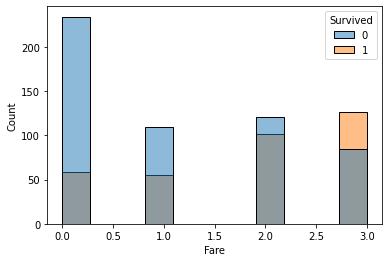

In [76]:
sns.histplot(x = 'Fare', hue = 'Survived', data = train_df)
# 더 정돈되게 시각화 하는 방법 찾기

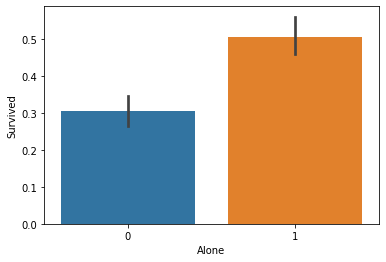

In [77]:
sns.barplot(x = 'Alone', y = 'Survived', data = train_df)

In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Name         891 non-null    int64
 4   Sex          891 non-null    int64
 5   Age          891 non-null    int64
 6   Fare         891 non-null    int64
 7   Embarked     891 non-null    int64
 8   Alone        891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB


In [79]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone
740,741,1,1,0,0,2,2,0,0
139,140,0,1,0,0,1,3,1,0
620,621,0,3,0,0,1,1,1,1
662,663,0,1,0,0,2,2,0,0
567,568,0,3,0,1,1,2,0,1
760,761,0,3,4,0,1,1,0,0
881,882,0,3,2,0,2,0,0,0
759,760,1,1,0,1,2,3,0,0
537,538,1,1,4,1,1,3,1,0
169,170,0,3,0,0,1,3,0,0


In [80]:
test_df.sample(10)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
244,1136,3,3,0,1,2,0,1
305,1197,1,2,1,4,2,0,1
193,1085,2,0,0,4,1,2,0
291,1183,3,1,1,1,0,2,0
129,1021,3,0,0,1,0,0,0
202,1094,1,4,0,3,3,1,1
161,1053,3,3,0,0,2,1,1
321,1213,3,0,0,1,0,1,0
414,1306,1,4,1,2,3,1,0
308,1200,1,0,0,3,3,0,1


# (02/14 수정)

In [81]:
# 요금과 탑승 장소는 상관관계가 없다고 판단
# for total_data in combine:
#   total_data = total_data.drop(['Fare', 'Embarked'], axis = 1,inplace = True)

# train_df


# 탑승장소만 상관이 없을 때
# for total_data in combine:
#   total_data = total_data.drop( 'Embarked', axis = 1,inplace = True)

# train_df

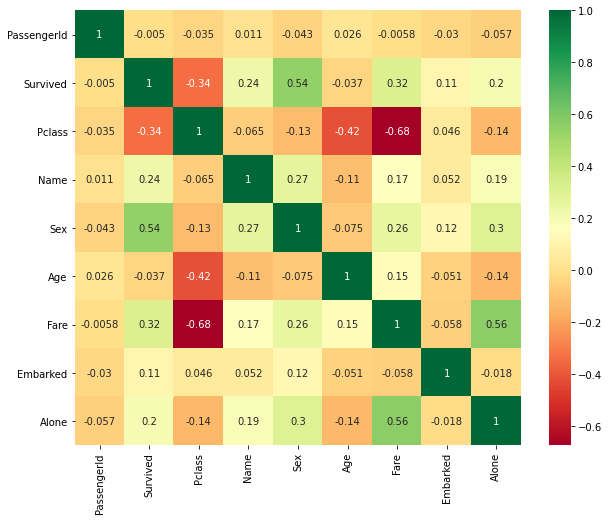

In [82]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn') #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


# 머신러닝을 통한 학습

## 간단한 설명
머신러닝은 정말 많은 기법들이 있다. 그 중에서 이번 타이타닉 셋으로 이용할 수 있는 것으로 줄여보면 Classification(분류) 과 Regression(회귀) 그리고 Supervised(지도학습) 세가지의 교집합에 들어가는 기법들 중 가장 유리한 기법을 사용해야한다.

1. Logistic Regression
2. KNN or K-Nearest Neighbors
3. Support Vector Machines
4. Decision Tree
5. Random Forrest


## 1. Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [84]:
x_train = train_df.drop(['Survived','PassengerId'], axis = 1).copy()
y_train = train_df['Survived']
x_test = test_df.drop('PassengerId', axis = 1).copy()


x_train.shape, y_train.shape, x_test.shape

((891, 7), (891,), (418, 7))

In [85]:
x_train

,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,3,0,0,1,0,0,1
1,1,2,1,2,3,1,1
2,3,1,1,1,0,0,0
3,1,2,1,2,3,0,1
4,3,0,0,2,0,0,0
...,...,...,...,...,...,...,...
886,2,2,0,1,1,0,0
887,1,4,1,1,2,0,0
888,3,1,1,1,2,0,1
889,1,1,0,1,2,1,0


In [86]:
x_test

,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,3,0,0,2,0,2,0
1,3,2,1,3,0,0,1
2,2,0,0,4,1,2,0
3,3,0,0,1,1,0,0
4,3,2,1,1,1,0,1
...,...,...,...,...,...,...,...
413,3,0,0,1,0,0,0
414,1,4,1,2,3,1,0
415,3,0,0,2,0,0,0
416,3,0,0,1,0,0,0


In [87]:
lr = LogisticRegression() # 모델 선언
lr.fit(x_train, y_train) # 모델 학습
# 출력은 세팅값 (여러가지를 세부 세팅할 수 있음)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
lr_pred = lr.predict(x_test)
accuracy = round(lr.score(x_train, y_train)*100, 2)
accuracy


79.57

In [89]:
#79.57('Fare','Embarked'포함)
#79.57('Fare','Embarked'미포함)
#79.69('Embarked'미포함)

## 2. 랜덤포레스트

In [90]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

88.66

In [91]:
#88.66('Fare','Embarked'포함)
#83.28('Fare','Embarked'미포함)
#86.42('Embarked'미포함)

## 3. KNN

In [93]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

84.85

## 4. Support Vector Machines

In [94]:
svc = SVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

82.49

## 5. Decision Tree

In [95]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

88.66

# 현재 상태

통계 학습 안되어있음

어떻게 결측지처리해야하는가?

어떤 그래프를 어떻게 사용해야하는가?

어떤 모델을 사용해야하는가 타이타닉은 classification이니까 거기에 맞는 모델이 무엇이 있고 어떤것이 가장유리한가